## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import DataSet

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,allow
1,18986,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,deny
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,allow
3,57352,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,drop
4,17229,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,allow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,36322,NaN,53.0,NaN,53.0,94.0,94.0,0.0,NaN,29.0,NaN,NaN,allow
45866,36418,NaN,53.0,44635.0,53.0,177.0,94.0,83.0,2.0,NaN,NaN,1.0,allow
45867,2289,50438.0,445.0,0.0,0.0,70.0,NaN,0.0,1.0,0.0,1.0,0.0,drop
45868,10229,37785.0,80.0,22917.0,80.0,2293.0,1576.0,NaN,12.0,15.0,6.0,NaN,allow


In [4]:
df.describe()

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,45870.000000,36683.000000,36693.000000,36756.000000,36674.000000,3.660700e+04,3.676400e+04,3.669300e+04,3.681800e+04,36584.000000,36667.000000,36711.000000
mean,32797.449836,49329.346318,10624.590058,19196.912205,2671.815428,1.148907e+05,1.228142e+04,8.011654e+04,1.236311e+02,66.069347,54.090436,65.390837
std,18900.225614,15303.525501,18537.440516,21919.020121,9788.359899,7.073021e+06,1.285235e+06,2.680172e+06,6.610959e+03,308.272172,4266.688906,2511.329970
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,16480.500000,49160.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,32834.500000,53766.000000,445.000000,8692.500000,53.000000,1.680000e+02,9.050000e+01,7.400000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,49167.500000,58611.500000,15000.000000,38106.250000,443.000000,7.490000e+02,2.040000e+02,4.440000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65531.000000,65534.000000,65535.000000,65535.000000,65534.000000,1.269359e+09,2.134436e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45870 entries, 0 to 45869
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    45870 non-null  int64  
 1   Source Port           36683 non-null  float64
 2   Destination Port      36693 non-null  float64
 3   NAT Source Port       36756 non-null  float64
 4   NAT Destination Port  36674 non-null  float64
 5   Bytes                 36607 non-null  float64
 6   Bytes Sent            36764 non-null  float64
 7   Bytes Received        36693 non-null  float64
 8   Packets               36818 non-null  float64
 9   Elapsed Time (sec)    36584 non-null  float64
 10  pkts_sent             36667 non-null  float64
 11  pkts_received         36711 non-null  float64
 12  Action                45870 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 4.5+ MB


### Total percentage of data is missing

In [6]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

16.92408311113347


In [7]:
for i in df.columns:
    print(df[i].unique())

[59276 18986 11131 ...  2289 10229 42470]
[49418. 58120. 46751. ... 32727. 49251. 37785.]
[27015. 25174.    53. ... 51237.  6886. 46390.]
[54748.    nan 46751. ... 57139. 44635. 22917.]
[   nan     0.    53. ... 27068. 46390. 23915.]
[7.80000e+01 6.60000e+01 2.20000e+02 ... 5.64900e+03 1.20910e+04
 3.10549e+05]
[   78.    66.    90. ... 63528. 15948.  9420.]
[0.00000e+00 1.30000e+02 3.52000e+02 ... 6.56100e+03 6.26000e+03
 3.01129e+05]
[1.000000e+00          nan 2.000000e+00 7.000000e+00 1.600000e+01
 5.400000e+01 1.400000e+01 4.000000e+00 4.651000e+03 4.300000e+01
 4.200000e+01 8.700000e+01 3.000000e+00 6.000000e+00 1.370000e+02
 1.430000e+02 2.900000e+01 1.300000e+01 2.200000e+01 2.800000e+01
 2.000000e+01 5.257000e+03 2.400000e+01 5.000000e+00 1.200000e+01
 3.980000e+02 6.000000e+01 1.700000e+01 2.700000e+01 1.900000e+01
 3.263000e+03 6.300000e+01 1.500000e+01 1.100000e+01 2.110000e+02
 6.600000e+01 2.100000e+01 3.300000e+01 9.200000e+01 1.000000e+01
 2.600000e+01 3.900000e+01 3.000

## Label encoding from categorical featurtes

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
le.fit(df['Action'])
list(le.classes_)
df['Action'] = le.transform(df['Action']) 
df

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,18986,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,1
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,0
3,57352,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,2
4,17229,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,36322,NaN,53.0,NaN,53.0,94.0,94.0,0.0,NaN,29.0,NaN,NaN,0
45866,36418,NaN,53.0,44635.0,53.0,177.0,94.0,83.0,2.0,NaN,NaN,1.0,0
45867,2289,50438.0,445.0,0.0,0.0,70.0,NaN,0.0,1.0,0.0,1.0,0.0,2
45868,10229,37785.0,80.0,22917.0,80.0,2293.0,1576.0,NaN,12.0,15.0,6.0,NaN,0


### Data Cleaning

In [10]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,ID,0.000000
1,Source Port,20.028341
2,Destination Port,20.006540
3,NAT Source Port,19.869196
4,NAT Destination Port,20.047962
5,Bytes,20.194027
6,Bytes Sent,19.851755
7,Bytes Received,20.006540
8,Packets,19.734031
9,Elapsed Time (sec),20.244168


In [11]:
null_counts = df.isnull().sum()
null_counts

ID                         0
Source Port             9187
Destination Port        9177
NAT Source Port         9114
NAT Destination Port    9196
Bytes                   9263
Bytes Sent              9106
Bytes Received          9177
Packets                 9052
Elapsed Time (sec)      9286
pkts_sent               9203
pkts_received           9159
Action                     0
dtype: int64

### Replace all NaN values with the most frequent elements

In [12]:
columns_None = ['Source Port','Destination Port','Elapsed Time (sec)','NAT Source Port','Bytes Received','Bytes Sent','NAT Destination Port','Bytes']
df[columns_None] = df[columns_None].fillna(df.mode().iloc[0])

In [13]:
df

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,0.0,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,18986,58120.0,25174.0,0.0,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,1
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,0
3,57352,52596.0,53.0,0.0,0.0,66.0,66.0,0.0,1.0,0.0,1.0,0.0,2
4,17229,50584.0,6881.0,29773.0,0.0,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,36322,58638.0,53.0,0.0,53.0,94.0,94.0,0.0,NaN,29.0,NaN,NaN,0
45866,36418,58638.0,53.0,44635.0,53.0,177.0,94.0,83.0,2.0,0.0,NaN,1.0,0
45867,2289,50438.0,445.0,0.0,0.0,70.0,70.0,0.0,1.0,0.0,1.0,0.0,2
45868,10229,37785.0,80.0,22917.0,80.0,2293.0,1576.0,0.0,12.0,15.0,6.0,NaN,0


### Replace NaN values with the preceeding values 

In [14]:
df.fillna(method='ffill', inplace=True)

In [15]:
df

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,0.0,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,18986,58120.0,25174.0,0.0,0.0,66.0,66.0,0.0,1.0,0.0,1.0,0.0,1
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,1.0,1.0,0
3,57352,52596.0,53.0,0.0,0.0,66.0,66.0,0.0,1.0,0.0,1.0,0.0,2
4,17229,50584.0,6881.0,29773.0,0.0,502.0,150.0,352.0,2.0,1200.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,36322,58638.0,53.0,0.0,53.0,94.0,94.0,0.0,2.0,29.0,1.0,1.0,0
45866,36418,58638.0,53.0,44635.0,53.0,177.0,94.0,83.0,2.0,0.0,1.0,1.0,0
45867,2289,50438.0,445.0,0.0,0.0,70.0,70.0,0.0,1.0,0.0,1.0,0.0,2
45868,10229,37785.0,80.0,22917.0,80.0,2293.0,1576.0,0.0,12.0,15.0,6.0,0.0,0


In [16]:
null_count = df.isnull().sum()
null_count

ID                      0
Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

## show a few features with their Mutual Info scores

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
x = df.copy()
y = x.pop('Action')

In [19]:
for colname in x.select_dtypes('object'):
    x[colname],_ = x[colname].factorize()
    
discrete_features = x.dtypes ==int

In [20]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::1]

ID                      0.665683
Destination Port        0.660487
Bytes                   0.518390
Bytes Sent              0.500980
NAT Source Port         0.390296
NAT Destination Port    0.390061
Elapsed Time (sec)      0.388648
Bytes Received          0.350056
Packets                 0.322628
pkts_received           0.287837
Source Port             0.229789
pkts_sent               0.124549
Name: MI Scores, dtype: float64

## Data Visualization With most Dependent Features

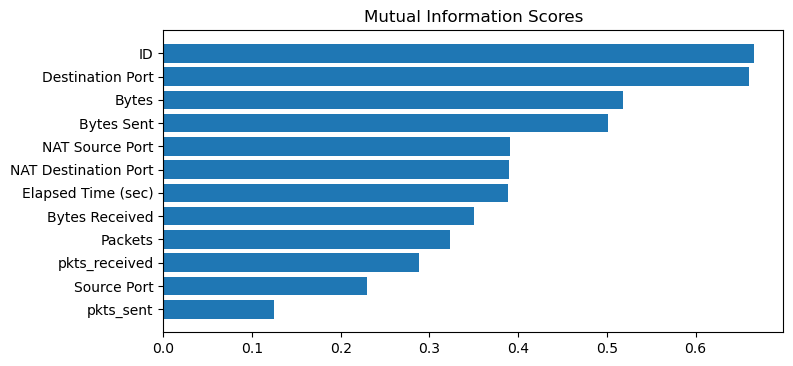

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 4))
plot_mi_scores(mi_scores)

### Multivariate Analysis

<AxesSubplot:xlabel='Source Port', ylabel='Count'>

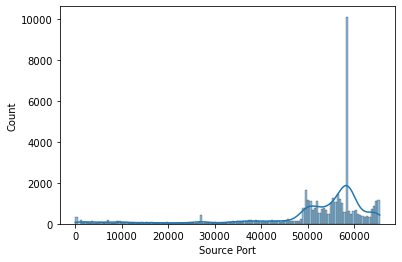

In [22]:
sns.histplot(data=df, x="Source Port", kde = True)

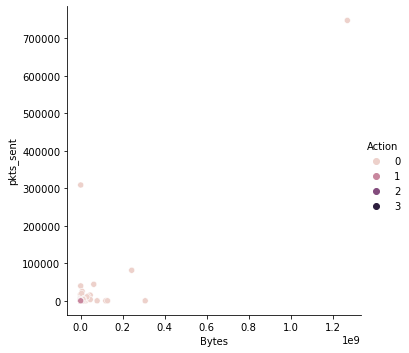

In [23]:
sns.relplot(x='Bytes', y='pkts_sent',hue='Action', data=df)

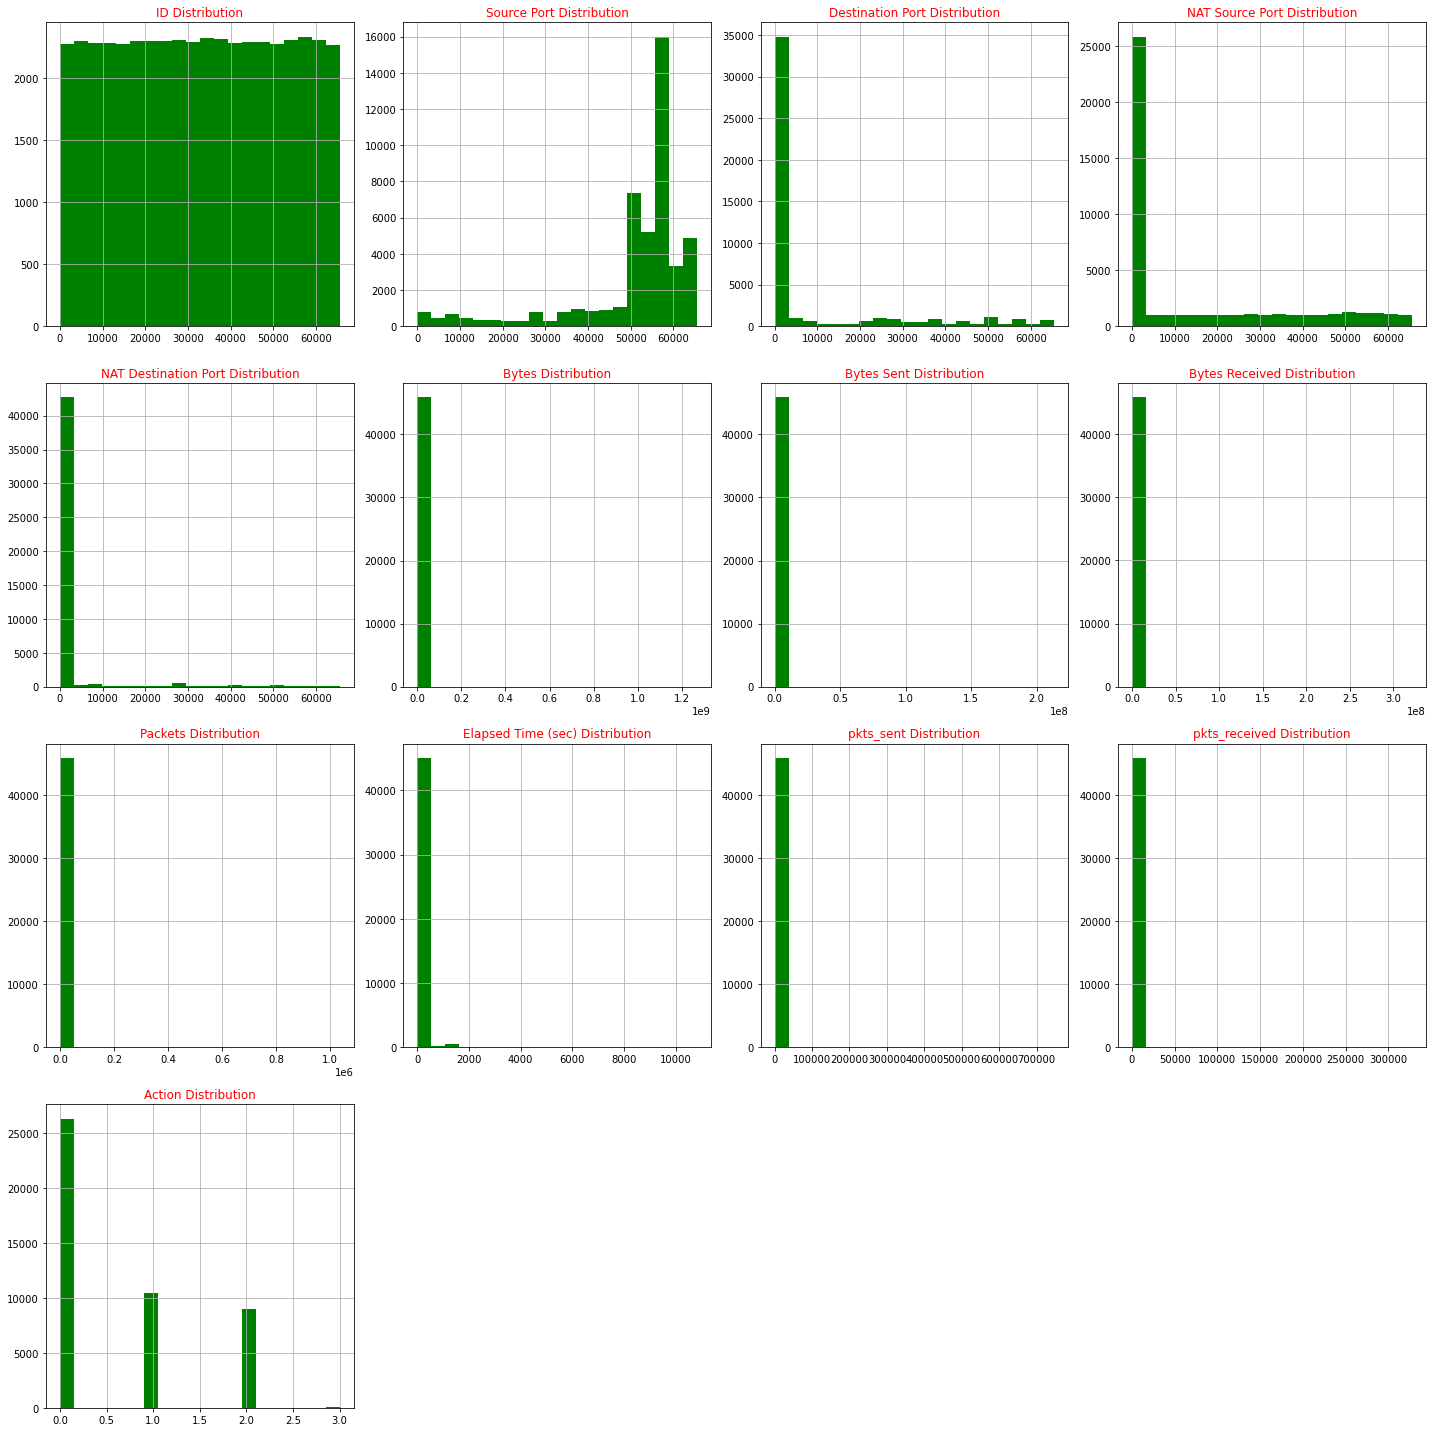

In [24]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,4,4)

## Correlation Matrix

In [25]:
r = np.random.RandomState(0)
df1 = pd.DataFrame(r.rand(10,10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
ID,1.000000,-0.002233,0.011138,0.010338,0.030847,-0.001129,0.006468,0.004419,0.002965,0.013903,-0.001298,0.005925,-0.000062
Source Port,-0.002233,1.000000,-0.254315,0.103167,-0.017767,0.003175,-0.008553,0.000707,-0.001222,-0.037025,-0.001781,-0.002839,0.031237
Destination Port,0.011138,-0.254315,1.000000,-0.205181,0.313263,-0.001502,0.005238,-0.009709,-0.005097,0.017833,-0.001077,-0.006562,0.082615
NAT Source Port,0.010338,0.103167,-0.205181,1.000000,0.130969,0.007253,0.007764,0.016502,0.006247,0.101442,0.006515,0.013006,-0.571887
NAT Destination Port,0.030847,-0.017767,0.313263,0.130969,1.000000,-0.000011,0.016557,-0.004598,-0.003142,0.167024,-0.001628,0.001072,-0.189781
Bytes,-0.001129,0.003175,-0.001502,0.007253,-0.000011,1.000000,0.056428,0.724715,0.724408,0.191623,0.883108,0.600785,-0.011371
Bytes Sent,0.006468,-0.008553,0.005238,0.007764,0.016557,0.056428,1.000000,0.388496,0.390223,0.054927,0.332121,0.653255,-0.006667
Bytes Received,0.004419,0.000707,-0.009709,0.016502,-0.004598,0.724715,0.388496,1.000000,0.780030,0.160340,0.807242,0.778024,-0.020963
Packets,0.002965,-0.001222,-0.005097,0.006247,-0.003142,0.724408,0.390223,0.780030,1.000000,0.149292,0.853253,0.765232,-0.008431
Elapsed Time (sec),0.013903,-0.037025,0.017833,0.101442,0.167024,0.191623,0.054927,0.160340,0.149292,1.000000,0.169200,0.142123,-0.149396


### Train Test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [27]:
X_train.shape

(36696, 12)

In [28]:
X_test.shape

(9174, 12)

In [29]:
Y_test.shape

(9174,)

In [30]:
from sklearn.metrics import accuracy_score

## Apply Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
Y_pred_lr.shape

(9174,)

In [33]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.89 %


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

In [36]:
print_score(lr, X_train, Y_train, X_test, Y_test, train=True)
print_score(lr, X_train, Y_train, X_test, Y_test, train=False)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 91.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1            2     3  accuracy  \
precision      0.981118     0.976806     0.745915   0.0  0.918383   
recall         0.959554     0.748449     0.999861   0.0  0.918383   
f1-score       0.970216     0.847515     0.854418   0.0  0.918383   
support    21065.000000  8384.000000  7214.000000  33.0  0.918383   

              macro avg  weighted avg  
precision      0.675960      0.933013  
recall         0.676966      0.918383  
f1-score       0.668037      0.918545  
support    36696.000000  36696.000000  
_______________________________________________


C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix: 
 [[20213   132   720     0]
 [  379  6275  1730     0]
 [    0     1  7213     0]
 [   10    16     7     0]]

Test Result:
Accuracy Score: 91.89%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2    3  accuracy    macro avg  \
precision     0.980873     0.978843     0.744458  0.0  0.918901     0.676044   
recall        0.961007     0.746914     0.999439  0.0  0.918901     0.676840   
f1-score      0.970839     0.847293     0.853308  0.0  0.918901     0.667860   
support    5283.000000  2106.000000  1781.000000  4.0  0.918901  9174.000000   

           weighted avg  
precision      0.934083  
recall         0.918901  
f1-score       0.919237  
support     9174.000000  
_______________________________________________
Confusion Matrix: 
 [[5077   31  175    0]
 [  98 1573  435    0]
 [   0    1 1780    0]
 [   1    2    1    0]]



C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
test_score = accuracy_score(Y_test, lr.predict(X_test)) * 100
train_score = accuracy_score(Y_train, lr.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,91.838348,91.890124


## Apply XGBoost

In [38]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:19:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [39]:
Y_pred_xgb.shape

(9174,)

In [40]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 99.16 %


## K Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [42]:
Y_pred_knn.shape

(9174,)

In [43]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 93.65 %


## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [45]:
Y_pred_nb.shape

(9174,)

In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 68.18 %


## Final Accuracy of all Models that which Model is best fitted

In [47]:
scores = [score_lr,score_nb,score_knn,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 91.89 %
The accuracy score achieved using Naive Bayes is: 68.18 %
The accuracy score achieved using K-Nearest Neighbors is: 93.65 %
The accuracy score achieved using XGBoost is: 99.16 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

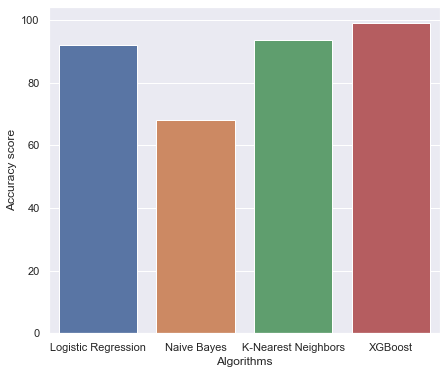

In [48]:
sns.set(rc={'figure.figsize':(7,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [49]:
df1 = pd.read_csv('test.csv')

In [50]:
df1

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,23127,50142.0,445.0,0.0,0.0,NaN,70.0,0.0,1.0,0.0,1.0,NaN
1,61535,49496.0,53.0,NaN,53.0,194.0,NaN,92.0,2.0,30.0,1.0,1.0
2,31457,49209.0,53.0,27106.0,NaN,199.0,102.0,NaN,NaN,31.0,NaN,1.0
3,49294,49225.0,53.0,NaN,53.0,295.0,101.0,194.0,NaN,48.0,2.0,2.0
4,8826,NaN,NaN,0.0,NaN,70.0,70.0,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19657,1083,NaN,25174.0,0.0,0.0,146.0,146.0,0.0,NaN,NaN,1.0,NaN
19658,20633,NaN,53.0,49003.0,53.0,194.0,102.0,92.0,2.0,31.0,1.0,1.0
19659,50324,27005.0,27015.0,NaN,27015.0,878.0,NaN,752.0,2.0,30.0,1.0,1.0
19660,16271,49676.0,53.0,NaN,NaN,216.0,110.0,106.0,2.0,30.0,1.0,1.0


In [51]:
NAN = [(c, df1[c].isnull().mean()*100) for c in df1]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,ID,0.000000
1,Source Port,20.186146
2,Destination Port,20.237005
3,NAT Source Port,20.684569
4,NAT Destination Port,20.048825
5,Bytes,19.718238
6,Bytes Sent,19.214729
7,Bytes Received,19.982708
8,Packets,19.967450
9,Elapsed Time (sec),20.135286


In [52]:
columns_None = ['Source Port','Destination Port','Elapsed Time (sec)','NAT Source Port','Bytes Received','Bytes Sent','NAT Destination Port','Bytes']
df1[columns_None] = df1[columns_None].fillna(df1.mode().iloc[0])

In [53]:
df1.fillna(method='ffill', inplace=True)

In [54]:
df1.fillna(method='backfill', inplace=True)

In [55]:
df1.head()

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,23127,50142.0,445.0,0.0,0.0,70.0,70.0,0.0,1.0,0.0,1.0,1.0
1,61535,49496.0,53.0,0.0,53.0,194.0,70.0,92.0,2.0,30.0,1.0,1.0
2,31457,49209.0,53.0,27106.0,0.0,199.0,102.0,0.0,2.0,31.0,1.0,1.0
3,49294,49225.0,53.0,0.0,53.0,295.0,101.0,194.0,2.0,48.0,2.0,2.0
4,8826,58638.0,53.0,0.0,0.0,70.0,70.0,0.0,1.0,0.0,2.0,2.0


In [56]:
df1.shape

(19662, 12)

In [57]:
Y_pred_lr = lr.predict(df1)

In [58]:
Y_pred_xgb = xgb_model.predict(df1)

C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [59]:
submission = pd.DataFrame({
        "ID": df1['ID'],
        "Action": Y_pred_xgb
    })

In [60]:
submission

,ID,Action
0,23127,2
1,61535,0
2,31457,0
3,49294,0
4,8826,1
...,...,...
19657,1083,1
19658,20633,0
19659,50324,0
19660,16271,0


In [63]:
submission['Action'] = submission['Action'].replace([0,1,2,3],['allow', 'deny' ,'drop', 'reset-both'])

In [64]:
submission

,ID,Action
0,23127,drop
1,61535,allow
2,31457,allow
3,49294,allow
4,8826,deny
...,...,...
19657,1083,deny
19658,20633,allow
19659,50324,allow
19660,16271,allow


In [65]:
submission.to_csv('DomainNameSecuritySubmission.csv', index=False)

# Submission on Kaggle

# End Model Prediction